---
"Exploring the Relationship Between Transport and Building Carbon Emissions in Canada"
---

# Introduction

After committing to reduce its carbon emissions by 50% by 2030, Canada is currently taking part in the ongoing COP 28 in Dubai. In Canada, most of the environmental public policy implications historically fall under what we call 'Environmental Impact Assessment,' a intricate process conducted by both the provinces and the federal government with an increasing number of prerogatives granted to Indigenous governing bodies. This assessment process was originally conducted case-by-case. More and more voices now advocate for a 'Strategic Environmental Assessment' evaluating plans, policies, and programs besides individual projects. This strategic process still remains discretionary (IAA 2019), which according to Bram F. Noble prevents strategic assessment from tackling the most pressing issues, such as shaping energy policy or providing strategic direction for institutional transition to address climate change ('Introduction to Environmental Impact Assessment: A Guide to Principles and Practice'). We aim to participate in the debate about sustainability planning by drawing attention to the ongoing structural relationship between different carbon emissions sources in Canada. Our analysis aims to identify leverages and setbacks that Canada should take into account when designing its policy of sustainability. Qualitative research already pointed out the influence of loose city planning on high carbon emissions for Canadian cities ('Variations in Direct Greenhouse Gas Emissions Across Neighbourhoods: A Case of Edmonton in Canada'). We will specifically explore the relationship between carbon emissions caused by the sectors of Buildings and Transport. To do so, we will be using data provided by the Canadian Government for the Canadian provinces for the last 30 years. This data covers all provinces' carbon emissions since 1990, and the sources thereof. Due to a lot of missing values for Nunavut and the Northwest Territories, we decided to remove these territories from our analysis. In the dataset provided by the federal government, the Buildings source entails both residential and industrial buildings. The transport sector encompassing Passenger Transport and Freight Transport.

In [1]:
library(tidyverse)
library(tidymodels)
install.packages("GGally")
library(GGally)
install.packages("kknn")
library(dials)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

#### Data Loading and Preparation
1. **Data Source**:
   - Dataset loaded from the Government of Canada's official Greenhouse Gas Inventory, focusing on emissions by economic sector.
   - URL: `https://data-donnees.az.ec.gc.ca/api/file?path=/substances/monitor/canada-s-official-greenhouse-gas-inventory/B-Economic-Sector/EN_GHG_Econ_Can_Prov_Terr.csv`

2. **Data Conversion to Numerical Format**:
   - Converted 'CO2eq' and 'Year' to numeric format in R for more efficient processing and analysis.

3. **Data Cleaning and Simplification**:
   - Removed redundant information by filtering out unnecessary columns. This step ensures that R does not sum up similar data from 'Sector', 'Sub.sector', and 'Sub.sub.sector' columns, which would lead to inaccurate totals.

#### Data Filtering for Analysis
4. **Focus on Relevant Data**:
   - Further filtered the dataset to concentrate on total CO2 emissions per province and year.
   - Excluded regions like "Canada", "Northwest Territories and Nunavut", "Nunavut" to avoid skewing data with incomplete or aggregated figures.

#### Exploratory Data Analysis
5. **Summary and Visualization**:
   - Performed a summary analysis to understand the distribution of emissions across provinces over time.
   - Generated a line plot using ggplot2 to visually represent the total CO2 equivalent emissions by year for each region.

#### Results
6. **Interpretation of Emission Trends**:
   - The line plot (Figure 1) illustrates emission patterns for different provinces and territories, highlighting trends over the years.
   - This visualization aids in understanding the magnitude and progression of emissions in each region.

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `CO2eq = as.numeric(CO2eq)`.
Caused by warning:
! NAs introduced by coercion”


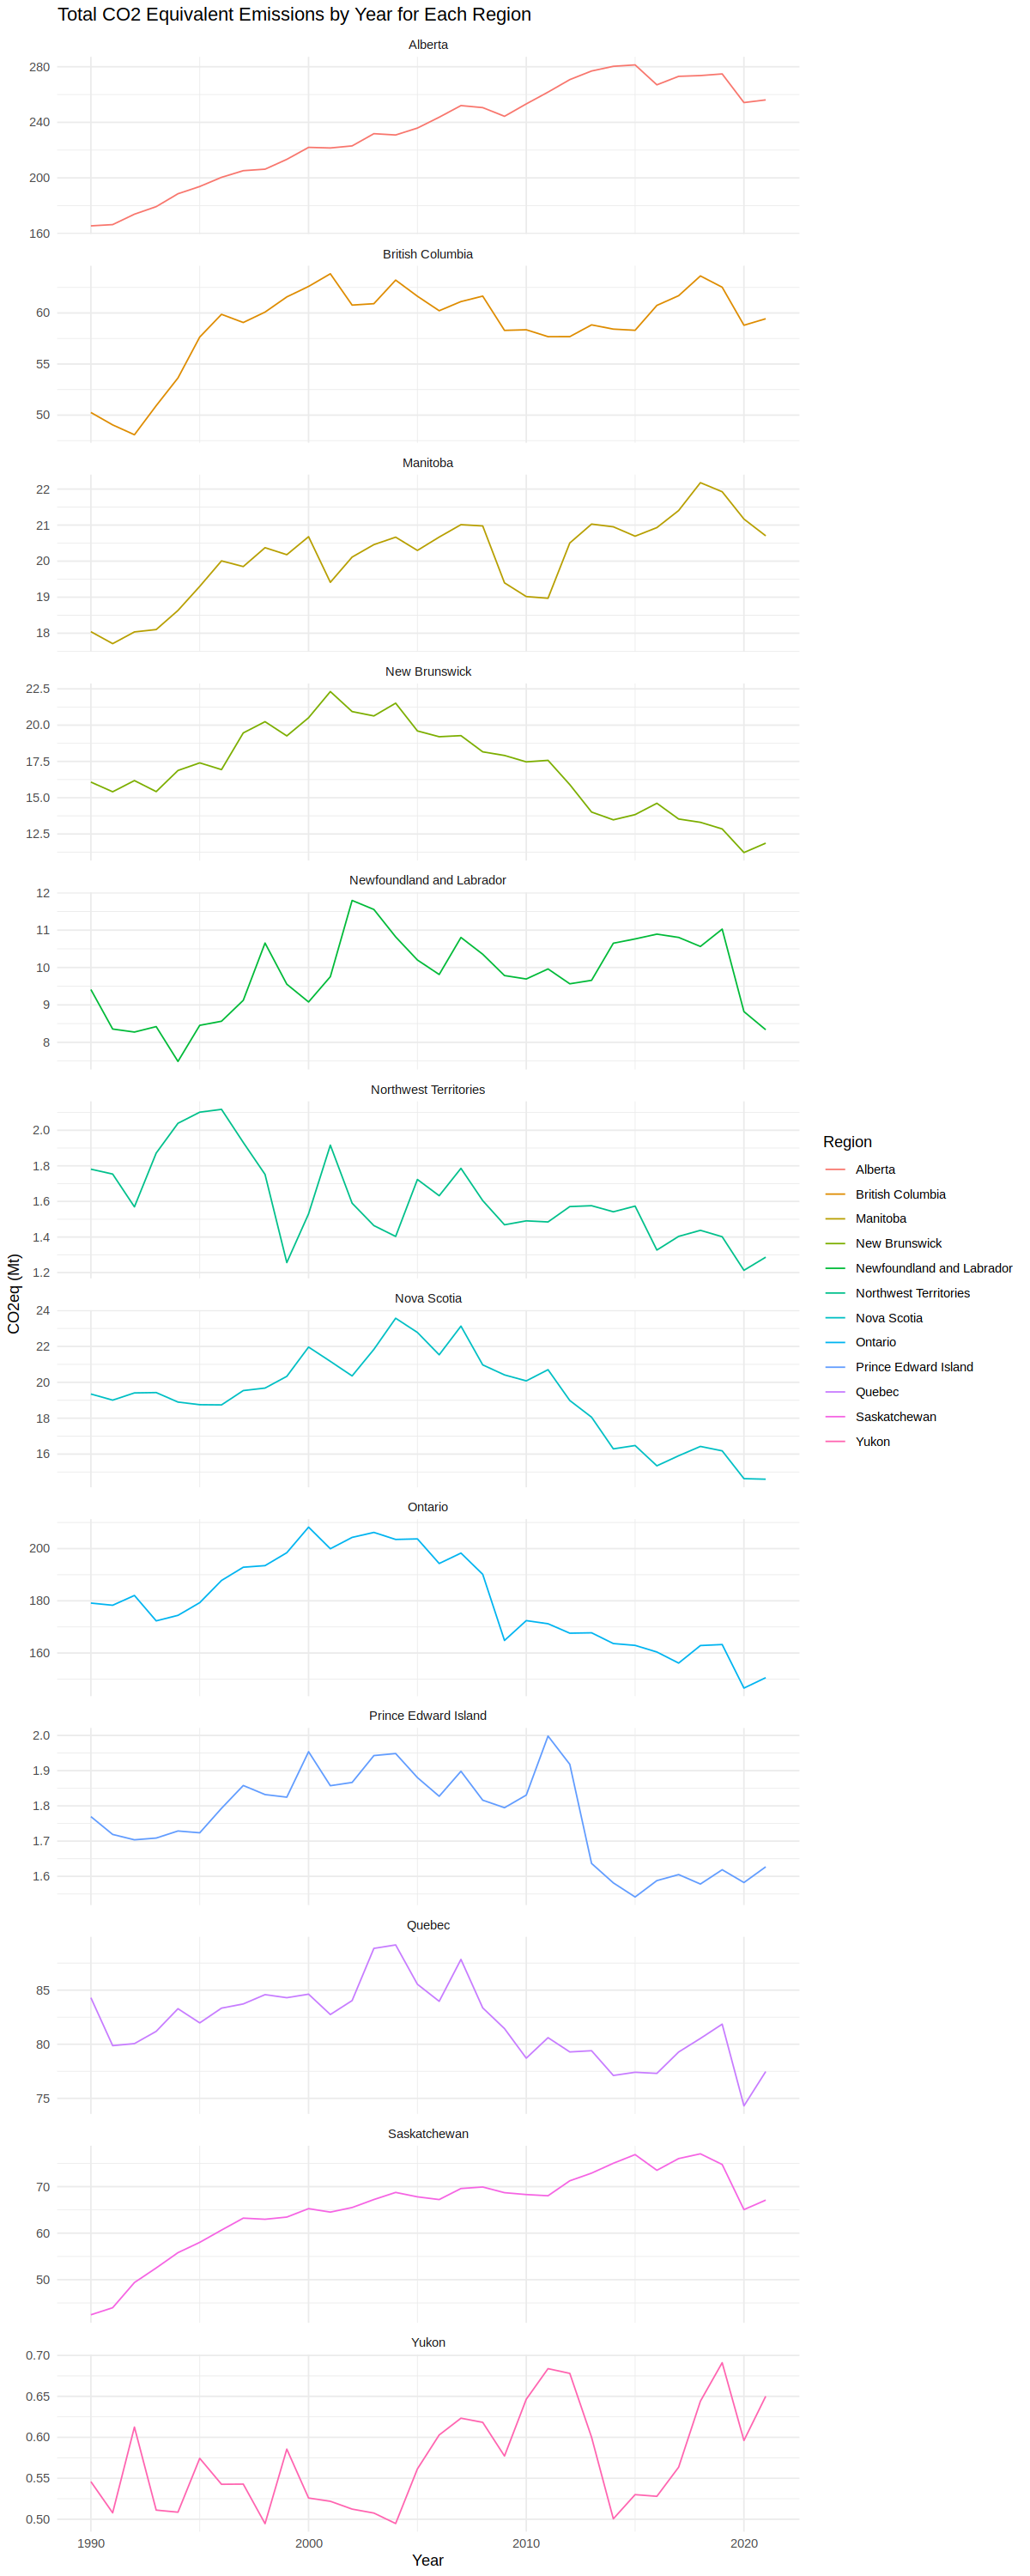

In [2]:
# Load data from the specified URL
url <- "https://data-donnees.az.ec.gc.ca/api/file?path=/substances/monitor/canada-s-official-greenhouse-gas-inventory/B-Economic-Sector/EN_GHG_Econ_Can_Prov_Terr.csv"
data_raw <- read.csv(url) |>
  mutate(
    CO2eq = as.numeric(CO2eq),
    Year = as.numeric(Year)
  ) 

#data_raw|>
#    head(n = 1) |>
#    pull(Sector)

emission_province <- data_raw|>
    filter(Sector == '') |>
    select(-Sector, -Sub.sector, -Sub.sub.sector, -Total, -Index, -Unit)

# Filtering for total emissions by province and year, excluding certain regions
total_per_province <- emission_province |>
  filter(Source %in% c("Provincial Inventory Total", "Territorial Inventory Total", "National Inventory Total"),
         !Region %in% c("Canada", "Northwest Territories and Nunavut", "Nunavut")) |>
  na.omit() |>
  select(Year, Region, CO2eq)

# Plotting total emissions per province over time
options(repr.plot.width = 10, repr.plot.height = 25)
total_emissions_plot <- ggplot(total_per_province, aes(x = Year, y = CO2eq, group = Region, color = Region)) +
  geom_line() +
  theme_minimal() +
  labs(title = "Total CO2 Equivalent Emissions by Year for Each Region", x = "Year", y = "CO2eq (Mt)") +
  facet_wrap(~Region, scales = "free_y", ncol = 1)

total_emissions_plot

#### Figure 1: Total CO2 Equivalent Emissions by Year for Each Region
- Displays emissions in Megatonnes (Mt) on the y-axis and the year on the x-axis.
- Each line represents a different region, with unique colors for differentiation.
- Facet wrapping is used for individual representation of each region's emissions, with adjusted y-axis scales for clarity.

#### Data Summarization and Transformation
1. **Summarizing Data**:
   - The `emission_province` dataset was further summarized by grouping it by 'Year', 'Region', and 'Source'.
   - We calculated the total CO2 emissions (`CO2eq`) for each group, while excluding regions with incomplete data such as "Nunavut", "Northwest Territories and Nunavut", and "Canada".

2. **Pivoting Data for Analysis**:
   - Pivoted the summarized data into a wide format using the `pivot_wider` function.
   - This transformation facilitated the comparison of CO2 emissions across different sources within the same year and region.
   - Non-numeric columns ('Year', 'Region') were removed to prepare the dataset for correlation analysis.

#### Correlation Analysis
3. **Preparing Data for Correlation Matrix**:
   - Converted all columns to numeric format to ensure compatibility with correlation analysis.
   - Computed the total emissions for each row by summing up the 'Provincial Inventory Total' and 'Territorial Inventory Total', followed by the removal of these columns to focus on individual sector emissions.

4. **Correlation Matrix Computation**:
   - Calculated the correlation matrix using the `cor()` function, employing 'pairwise.complete.obs' to handle missing values.
   - This matrix was used to assess the correlation between different sectors in terms of their CO2 emissions.

#### Results
5. **Interpreting the Correlation Matrix**:
   - The resulting correlation matrix (Table 1) provides insights into how different sectors are related in terms of their CO2 emissions.
   - Sectors with higher correlations suggest a stronger relationship in emission patterns, indicating potential areas where emission reduction in one sector could influence others.

In [3]:
# Summarizing the data before pivoting
summarized_EP <- emission_province |>
  filter(!Region %in% c("Nunavut", "Northwest Territories and Nunavut", "Canada")) |>
  group_by(Year, Region, Source) |>
  summarize(CO2eq = sum(CO2eq, na.rm = TRUE), .groups = "drop")


# Pivot the data to wide format
correlation_EP <- summarized_EP |>
  pivot_wider(names_from = Source, values_from = CO2eq) |>
  select(-Year, -Region)  # Remove non-numeric columns


# Convert all columns to numeric
correlation_EP <- correlation_EP |>
  mutate(across(everything(), as.numeric)) |>
   mutate(Total = rowSums(select(correlation_EP, `Provincial Inventory Total`, `Territorial Inventory Total`), na.rm = TRUE)) |>
    select(-`Provincial Inventory Total`, -`Territorial Inventory Total`)

# Compute the correlation matrix
correlation_matrix <- cor(correlation_EP, use = "pairwise.complete.obs")

# Viewing the correlation matrix
correlation_matrix

,Agriculture,Buildings,Coal Production,Electricity,Heavy Industry,"Light Manufacturing, Construction and Forest Resources",Oil and Gas,Transport,Waste,Total
Agriculture,1.0000000,0.6333534,-0.16365390,0.7708662,0.6042035,0.5260507,0.75685624,0.5941347,0.5970038,0.8706098
Buildings,0.6333534,1.0000000,0.37623647,0.5556668,0.9333942,0.9368530,0.38910513,0.9580382,0.9241489,0.8447799
Coal Production,-0.1636539,0.3762365,1.00000000,-0.1786170,0.3515481,0.6990328,0.02773756,0.6149599,0.5409850,0.1083417
Electricity,0.7708662,0.5556668,-0.17861698,1.0000000,0.5134194,0.4472623,0.81323640,0.4401487,0.4040018,0.8503592
Heavy Industry,0.6042035,0.9333942,0.35154808,0.5134194,1.0000000,0.9595172,0.31668581,0.9403661,0.9585951,0.8036572
"Light Manufacturing, Construction and Forest Resources",0.5260507,0.9368530,0.69903280,0.4472623,0.9595172,1.0000000,0.20710522,0.9521408,0.9429799,0.7393298
Oil and Gas,0.7568562,0.3891051,0.02773756,0.8132364,0.3166858,0.2071052,1.00000000,0.2924077,0.2776044,0.7985517
Transport,0.5941347,0.9580382,0.61495993,0.4401487,0.9403661,0.9521408,0.29240767,1.0000000,0.9766268,0.7873961
Waste,0.5970038,0.9241489,0.54098496,0.4040018,0.9585951,0.9429799,0.27760443,0.9766268,1.0000000,0.7684226
Total,0.8706098,0.8447799,0.10834168,0.8503592,0.8036572,0.7393298,0.79855169,0.7873961,0.7684226,1.0000000


#### Table 1: Correlation Matrix of CO2 Emissions Across Sectors
- This matrix displays the correlation coefficients between different sectors.
- Higher values indicate a stronger correlation, suggesting interconnected emission patterns.
- The matrix aids in identifying key sectors that, when targeted for emission reduction, might have a broader impact across other sectors.

#### Visualization of Correlations
1. **Setting Plot Dimensions**:
   - Configured the plot size to ensure clarity and readability, setting the width and height to 10 units each using `options(repr.plot.width = 10, repr.plot.height = 10)`.

2. **Creating the Correlation Plot**:
   - Employed the `ggpairs` function from the GGally package to create a pairs plot, which visualizes the correlations between all pairs of sectors.
   - This plot provides a comprehensive view of the relationships between different emission sectors, displaying scatterplots for each pair of sectors and histograms for individual sector distributions.

#### Results
3. **Interpreting the Plot**:
   - The `ggpairs` plot (Figure 2) offers a detailed visual overview of how emission levels in different sectors correlate with each other.
   - The plot includes both scatterplots, which show the nature of the correlation (positive, negative, or none) between sectors, and histograms, which provide insights into the distribution of emissions within individual sectors.

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggpairs_plot <- ggpairs(correlation_EP)
ggpairs_plot

Warning message:
“Removed 16 rows containing non-finite values (`stat_density()`).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 16 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 236 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 16 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 16 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 16 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 16 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 16 rows containing missing values”
Warning mess

#### Figure 2: Pairs Plot of Sector-wise CO2 Emission Correlations
- The plot consists of a grid where each cell represents the relationship between two different sectors.
- Scatterplots in each cell illustrate how emissions in one sector correlate with those in another.
- Histograms along the diagonal show the distribution of emissions within each sector.
- This visualization is instrumental in identifying sectors with strong interrelationships, which could be key targets for emission reduction strategies.

#### Identification of Key Sectors
1. **Sector Selection**:
   - Based on the insights gained from both Figure 1 (Total CO2 Emissions by Region) and Figure 2 (Pairs Plot of Sector-wise Emissions Correlations), five sectors were identified as having high correlations with other sectors. These are: "Buildings", "Heavy Industry", "Transport", "Light Manufacturing, Construction and Forest Resources", and "Waste".

#### Data Filtering for Sector Analysis
2. **Sector-specific Data Preparation**:
   - Filtered the `emission_province` dataset to focus on the identified key sectors, excluding regions with incomplete data.
   - Grouped the data by 'Year', 'Region', and 'Source' and calculated the sum of CO2 emissions for each group.

#### Visualization of Sectoral Emissions
3. **Creating the Sectoral Emissions Plot**:
   - Set the dimensions of the plot for clarity using `options(repr.plot.width = 10, repr.plot.height = 10)`.
   - Used ggplot2 to create a line plot visualizing the emissions for each of the selected sectors over time.
   - Employed `facet_wrap` to generate separate plots for each sector, with free y-axis scales to allow for comparisons across different emission levels.

#### Results
4. **Analyzing Sectoral Emission Trends**:
   - The sectoral emissions plot (Figure 3) illustrates the historical emission trends of the five identified key sectors across different regions.
   - It provides valuable insights into how emissions in these sectors have changed over the years, indicating whether they have increased or decreased.

In [ ]:
# Filtering data for specific sectors
emission_sector <- emission_province |>
  filter(Source %in% c("Transport", "Heavy Industry", "Buildings","Light Manufacturing, Construction and Forest Resources","Waste"),
         !Region %in% c("Nunavut", "Northwest Territories and Nunavut", "Canada")) |>
  group_by(Year, Region, Source) |>
  summarize(Sector_CO2eq = sum(CO2eq))

#emission_sector

# Plotting sectoral emissions over time
options(repr.plot.width = 10, repr.plot.height = 10)
sector_emissions_plot <- ggplot(emission_sector, aes(x = Year, y = Sector_CO2eq, color = Source)) +
  geom_line() +
  facet_wrap(~Source, scales = "free_y", ncol = 1) +
  labs(title = "Sectoral Emissions Over Time by Region", x = "Year", y = "Emissions (Mt)")

sector_emissions_plot

#### Figure 3: Sectoral Emissions Over Time by Region
- The plot displays emissions in Megatonnes (Mt) on the y-axis against the year on the x-axis.
- Each line represents a different region within a sector, with unique colors for each sector.
- The use of facet wrapping allows for a distinct visualization of each sector's emission trends, facilitating a direct comparison across sectors and regions.

#### Refinement of Sector Analysis
1. **Sector Trend Observations**:
   - Upon visualizing the emission trends, it was noted that 'Heavy Industry' emissions have been decreasing over the years compared to the other four sectors.
   - 'Light Manufacturing, Construction and Forest Resources' and 'Waste' sectors were found to have relatively lower emissions.
   - Consequently, these three sectors ('Heavy Industry', 'Light Manufacturing, Construction and Forest Resources', 'Waste') were not pursued further in the analysis.

2. **Focus on 'Transport' and 'Buildings' Sectors**:
   - The remaining sectors, 'Transport' and 'Buildings', were identified as key areas for further analysis due to their significant emission levels and potential correlations.

#### Correlation Analysis between 'Transport' and 'Buildings'
3. **Data Selection for Correlation Analysis**:
   - Selected data pertaining to the 'Transport' and 'Buildings' sectors from the previously computed `correlation_EP` dataset.

4. **Dot Plots Creation**:
   - Two dot plots were created to visually examine the relationship between carbon emissions from the 'Transport' and 'Buildings' sectors.
   - The first plot (Figure 4) shows 'Transport' emissions on the x-axis and 'Buildings' emissions on the y-axis.
   - The second plot (Figure 5) reverses these axes, displaying 'Buildings' emissions on the x-axis and 'Transport' emissions on the y-axis.
   - Both plots include scales with labels in Megatonnes (Mt) for clarity.

#### Results
5. **Interpreting the Dot Plots**:
   - The dot plots (Figures 4 and 5) offer a clear visualization of the relationship between the carbon emissions of the 'Buildings' and 'Transport' sectors.
   - These plots are instrumental in assessing whether there is a noticeable correlation between the two sectors’ emissions.

In [ ]:
BT_EP <- correlation_EP |>
    select(Transport, Buildings)

BTEP_transport_plot <- ggplot(BT_EP, aes(x = Transport, y = Buildings)) +
                              geom_point() +
                              scale_y_continuous(labels = label_number(suffix = " Mt")) +
                              scale_x_continuous(labels = label_number(suffix = " Mt")) +
                              labs(title = "relationship between buildings's and transport's carbon emmission", 
                                   y = "Building's Carbon emissions (Mt)",
                                   x = "Transport's Carbon emissions (Mt)")

BTEP_building_plot <- ggplot(BT_EP, aes(x = Buildings, y = Transport)) +
                              geom_point() +
                              scale_y_continuous(labels = label_number(suffix = " Mt")) +
                              scale_x_continuous(labels = label_number(suffix = " Mt")) +
                              labs(title = "relationship between buildings's and transport's carbon emmission", 
                                   y = "Transport's Carbon emissions (Mt)",
                                   x = "Building's Carbon emissions (Mt)")

BTEP_transport_plot
BTEP_building_plot

#### Figure 4: Relationship between Buildings' and Transport's Carbon Emissions
- Displays 'Transport' emissions on the x-axis and 'Buildings' emissions on the y-axis.
- Helps in understanding how changes in 'Transport' emissions relate to changes in 'Buildings' emissions.

#### Figure 5: Relationship between Buildings' and Transport's Carbon Emissions (Reversed Axes)
- Displays 'Buildings' emissions on the x-axis and 'Transport' emissions on the y-axis.
- Provides a different perspective on the interrelationship between the two sectors.

#### Implementing k-Nearest Neighbors (kNN) Regression
1. **Data Preparation for kNN Regression**:
   - Set a seed for reproducibility using `set.seed(3925)`.
   - Split the dataset (`BT_EP`) into training (75%) and testing (25%) sets to evaluate the kNN model's performance.

2. **Model Setup and Tuning**:
   - Created a recipe for predicting 'Transport' emissions using 'Buildings' emissions, involving scaling and centering of predictors.
   - Defined a kNN model specification with tuning on the number of neighbors.
   - Performed 5-fold cross-validation to assess model performance, focusing on optimizing the root mean square prediction error (RMSPE).

3. **Model Training and Evaluation**:
   - Conducted grid search over different values of neighbors to find the optimal number minimizing RMSPE.
   - Fitted the kNN model with the identified optimal number of neighbors to the training data.

#### Visualization of kNN Regression Results
4. **kNN Regression Results Plot**:
   - Created a plot (Figure 6) to visualize the effects of the number of neighbors on the RMSPE.
   - Plotted the kNN regression line on the scatter plot of 'Transport' and 'Buildings' emissions to visualize the model's predictions.

#### Results
5. **Analysis of kNN Regression**:
   - The RMSPE plot (Figure 6) illustrates how the prediction error varies with different numbers of neighbors, guiding the selection of the optimal model.
   - The final kNN plot (Figure 7) shows the relationship between 'Buildings' and 'Transport' emissions, with the regression line indicating the model's predictions.
   - However, the kNN model showed limitations, particularly beyond the range of the data, indicating that it might not be the best method for predicting correlations in this context.

In [ ]:
#Setting q seed (dont remove this)
set.seed(3925)

#Splitting the dataset, training and testing
BTEP_split <- initial_split(BT_EP, prop = 0.75)
BTEP_train <- training(BTEP_split)
BTEP_test <- testing(BTEP_split)

In [ ]:
#Creating a recipe to predict transport emissiom using building emission
BTEP_recipe <- recipe(Buildings ~ Transport, data = BTEP_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

In [ ]:
BTEP_spec <- nearest_neighbor(weight_func = "rectangular",
             neighbors = tune()) |>
             set_engine("kknn") |>
             set_mode("regression")

BTEP_vfold <- vfold_cv(BTEP_train, v = 5, strata = Buildings)

BTEP_workflow <-  workflow() |>
    add_recipe(BTEP_recipe) |>
    add_model(BTEP_spec) 

BTEP_workflow

In [ ]:
gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

BTEP_results <- BTEP_workflow |>
    tune_grid(resamples = BTEP_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == 'rmse')


BTEP_results_mean <- BTEP_results |>
    select(neighbors, mean)

#BTEP_results_mean

In [ ]:
BTEP_results_plot <- ggplot(BTEP_results_mean, aes(x = neighbors, y = mean)) +
                     geom_point() +
                     geom_line() +
                     labs(title = "Effects of the number of neighbors on the RMSPE",
                          x = "Neighbors",
                          y = "RMSPE")
BTEP_results_plot

#### Figure 6: RMSPE vs. Number of Neighbors in kNN Regression
- Demonstrates the relationship between the number of neighbors and RMSPE.
- Helps in identifying the optimal number of neighbors for the kNN model.

In [ ]:
#Pulling the number of neighbor with the smallest RMSPE
BTEP_min <- BTEP_results |>
    filter(mean == min(mean))
BTEP_min

In [ ]:
kmin <- BTEP_min |> pull(neighbors)

BTEP_spec_min <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = kmin) |>
                 set_engine("kknn") |>
                 set_mode("regression")

BTEP_fit <- workflow() |>
    add_recipe(BTEP_recipe) |>
    add_model(BTEP_spec_min) |>
    fit(data = BTEP_train)

BTEP_summary <- BTEP_fit |>
    predict(BTEP_test) |>
    bind_cols(BTEP_test) |>
    metrics(truth = Buildings, estimate = .pred) |>
    filter(.metric == 'rmse')
BTEP_summary

In [ ]:
BTEP_prediction_grid <- tibble(
        Transport = seq(
        from = BT_EP |> select(Transport) |> min(),
        to = 70,
        by = 0.01))

#BTEP_prediction_grid

In [ ]:
BTEP_preds <- BTEP_fit |>
    predict(BTEP_prediction_grid) |>
    bind_cols(BTEP_prediction_grid)

#BTEP_preds

In [ ]:
BTEP_plot_final <- ggplot(BT_EP, aes(x = Transport, y = Buildings)) +
    geom_point()+
    geom_line(data = BTEP_preds,
    mapping = aes(x = Transport, y = .pred),
    color = "blue") +
    ylab("Carbon emission of Building source (Mt)") +
    xlab("Carbon emission of Transport source (Mt)") +
    scale_y_continuous(labels = label_number(suffix = " Mt")) +
    scale_x_continuous(labels = label_number(suffix = " Mt")) +
    theme(text = element_text(size = 12)) 

BTEP_plot_final

#### Figure 7: kNN Regression on Transport and Buildings Emissions
- Displays a scatter plot of 'Transport' vs. 'Buildings' emissions.
- Includes a kNN regression line representing the model's predictions.
- Reveals the limitations of the kNN model in extrapolating beyond the data range.

#### Implementing Linear Regression
1. **Linear Regression Model Setup**:
   - A linear regression model (`linear_reg`) was set up using the 'lm' engine in R.
   - A workflow was created integrating the previously defined recipe with the linear regression model.

2. **Model Training**:
   - The linear regression model was trained using the `BTEP_train` dataset.

3. **Model Evaluation**:
   - The model's performance was evaluated on the `BTEP_test` dataset.
   - The root mean square error (RMSE) was computed to assess the accuracy of the model.

#### Visualization of Linear Regression Results
4. **Linear Regression Plot**:
   - Created a plot (Figure 8) to visualize the relationship between 'Transport' and 'Buildings' emissions using the linear regression model.
   - The plot includes actual data points and a linear regression line, illustrating the model's predictions.

#### Results
5. **Analysis of Linear Regression**:
   - The linear regression plot (Figure 8) effectively shows the correlation between 'Transport' and 'Buildings' emissions.
   - The linear model provides coefficients that quantify the relationship between these two sectors, offering a clear, quantifiable measure of their correlation.
   - The RMSE value from the model evaluation gives an indication of the model's prediction accuracy.

In [ ]:
BTEP_spec_lr <- linear_reg() |> 
                set_engine("lm") |>
                set_mode("regression")

# Workflow for Linear Regression
BTEP_workflow_lr <- workflow() |>
                    add_recipe(BTEP_recipe) |>
                    add_model(BTEP_spec_lr)

# Fit the Linear Regression Model
BTEP_fit_lr <- BTEP_workflow_lr |>
               fit(data = BTEP_train)

BTEP_fit_lr
# Model Summary
BTEP_summary_lr <- BTEP_fit_lr |>
                   predict(BTEP_test) |>
                   bind_cols(BTEP_test) |>
                   metrics(truth = Buildings, estimate = .pred) |>
                   filter(.metric == 'rmse')

BTEP_summary_lr

# Prepare a grid for prediction
BTEP_prediction_grid_lr <- tibble(Transport = seq(from = min(BT_EP$Transport), to = 70, by = 0.01))

# Make Predictions
BTEP_preds_lr <- BTEP_fit_lr |>
                 predict(BTEP_prediction_grid_lr) |>
                 bind_cols(BTEP_prediction_grid_lr)

# Final Plot
BTEP_plot_final_lr <- ggplot(BT_EP, aes(x = Transport, y = Buildings)) +
                      geom_point() +
                      geom_line(data = BTEP_preds_lr, aes(x = Transport, y = .pred), color = "blue") +
                      ylab("Carbon emission of Building source (Mt)") +
                      xlab("Carbon emission of Transport source (Mt)") +
                      scale_y_continuous(labels = label_number(suffix = " Mt")) +
                      scale_x_continuous(labels = label_number(suffix = " Mt")) +
                      theme(text = element_text(size = 12))
BTEP_plot_final_lr

#### Figure 8: Linear Regression on Transport and Buildings Emissions
- Displays a scatter plot of 'Transport' vs. 'Buildings' emissions.
- Includes a linear regression line, representing the model's predictions.
- The plot aids in understanding the linear relationship between the emissions of the two sectors and provides a basis for quantitative analysis.

# Discussion

Both the correlation test and the linear regression show a clear positive correlation between the carbon emissions of the Transport and Buildings sectors for Canadian provinces since 1990. In other words, a linear regression model fitted on the Government’s dataset predicts that the carbon emissions caused by both residential and industrial buildings increase by more than 9 MT every time emissions caused by transport increase by one MT. These results draw attention to the strong positive correlation between what are among the most important factors in Canada’s carbon emissions. We were also surprised that Oil and Gas's carbon emissions are not the ones that are most strongly correlated to a province’s global emissions. Other interesting correlations remain to be explored, such as the positive relationship between waste and heavy industry. Our results show the need for a strong and coherent strategic assessment policy backing up case-by-case environmental impact assessments. Deep research needs to be done to further explore the intricate relationship between transport and buildings, such as determining the weight of economic growth or correlations with other factors. Moreover, we hope our findings can shed new light on the Trans Mountain Pipeline Expansion project, which will subsequently multiply freight transport in the Burrard Inlet despite many First Nations councils’ independent assessment documents opposing it. Interested readers can look up the impact assessment conducted by the Tsleil-Waututh’s governing council for further information.

# Bibliography:
- Assessment of the trans mountain pipeline and tanker expansion proposal, n.d. . Treaty, Lands & Resources Department, Tsleil-Wautuh Nation.
- Canada’s Official Greenhouse Gas Inventory, 2023.
- Noble, B.F., 2014. Introduction to Environmental Impact Assessment: A Guide to Principles and Practice. Oxford University Press.
- Welegedara, N.P.Y., Agrawal, S.K., Gajjar, S., Joshi, N., 2021. Variations in direct greenhouse gas emissions across neighbourhoods: A case of Edmonton in Canada. Environmental Challenges Volume 5.